## Recompose Classics : **Data Preprocessing**
Hannah Do
April 22nd, 2021


---


##### **Summary**

1. Conversion of **midi** to **wav** files :

 *fluidsynth*


2. Conversion of **wav** files to **spectograms** :

  *librosa*


---

**Mount from Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


**Get folder with Chopin classics only**

In [3]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

audio_fpath = "/content/gdrive/My Drive/Classics_DNN/unzipped_classics/"
audio_clips = os.listdir(audio_fpath+'chopin/')
print("No. of .midi files in audio folder = ",len(audio_clips))

No. of .midi files in audio folder =  49


**Imports to convert midi files into wav files - fluidsynth**

In [2]:
!sudo apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

!cp /content/gdrive/My\ Drive/Classics_DNN/unzipped_classics/chopin/*.mid /content/mids/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth1 libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth1 libqt5x11extras5 qsynth
0 upgraded, 5 newly installed, 0 to remove and 31 not upgraded.
Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libfluidsynth1 amd64 1.1.9-1 [137 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluidsynth amd64 1.1.9-1 [20.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libqt5x11extras5 amd64 5.9.5-0ubuntu1 [8,596 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic/uni

**Change of directory to 'content' during 'midi to wav' conversion and back to google drive folder to avoid shell script error**

In [132]:

i=0
for i in range(len(audio_clips)):
  ! fluidsynth -ni font.sf2 {'/content/mids/'+audio_clips[i]} -F {'/content/wavs/'+os.path.splitext(audio_clips[i])[0]+'.wav'} -r 44100
  print(os.path.splitext(audio_clips[i])[0]+'.wav file downloaded \n')
  i += 1


In [126]:
!cp /content/wavs/*wav /content/gdrive/My\ Drive/Classics_DNN/unzipped_classics/chopin_wavs2

**Open through librosa as numpy array**

In [11]:
audio_fpath = '/content/gdrive/My Drive/Classics_DNN/unzipped_classics/chopin_wavs2/'
audio_clips = os.listdir(audio_fpath)

x, sr = librosa.load(audio_fpath+audio_clips[0], sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(4918720,) 44100


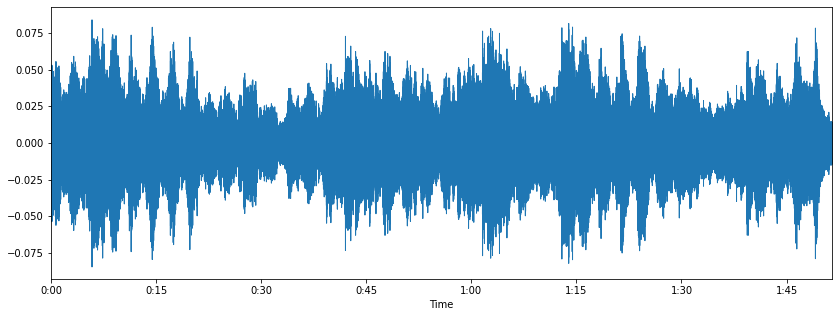

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)


**Show as Spectogram**

In [5]:
from matplotlib import pyplot as plt

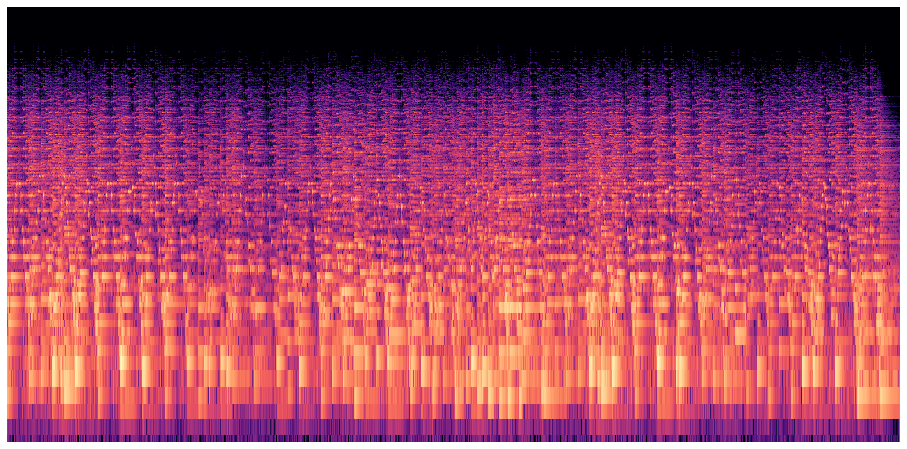

In [9]:

X = librosa.stft(x)
plt.figure(figsize=(16, 8))
ax = plt.axes()
ax.set_axis_off()
plt.set_cmap('hot')
librosa.display.specshow(librosa.amplitude_to_db(abs(X)), y_axis='log', x_axis='time',sr=sr)
plt.show()


**Apply spectogram conversion for every song and save it in 'chopin_spectogram' folder**

In [13]:
audio_clips[25]

'chpn-p13.wav'

In [ ]:

for i in range(len(audio_clips)):

  x, sr = librosa.load(audio_fpath+audio_clips[i], sr=44100)

  X = librosa.stft(x)
  plt.figure(figsize=(16, 8))
  ax = plt.axes()
  ax.set_axis_off()
  plt.set_cmap('hot')
  librosa.display.specshow(librosa.amplitude_to_db(abs(X)), y_axis='log', x_axis='time',sr=sr)

  plt.savefig('/content/gdrive/My Drive/Classics_DNN/unzipped_classics/chopin_spectogram/'+os.path.splitext(audio_clips[i])[0]+'.png', bbox_inches='tight', transparent=True, pad_inches=0.0 )

  print(os.path.splitext(audio_clips[i])[0]+' spectogram downloaded \n')

  i += 1


chpn_op33_4 spectogram downloaded 

chpn_op35_1 spectogram downloaded 

chpn_op35_2 spectogram downloaded 

chpn_op35_3 spectogram downloaded 

chpn_op35_4 spectogram downloaded 

chpn_op53 spectogram downloaded 

chpn_op66 spectogram downloaded 

chpn_op7_1 spectogram downloaded 

